In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

开始计算最终评估指标...
✅ 模型 'T-KAN Model' 的 RMSE: 1.7613 (米)
✅ 模型 'G-kan Model' 的 RMSE: 1.3651 (米)


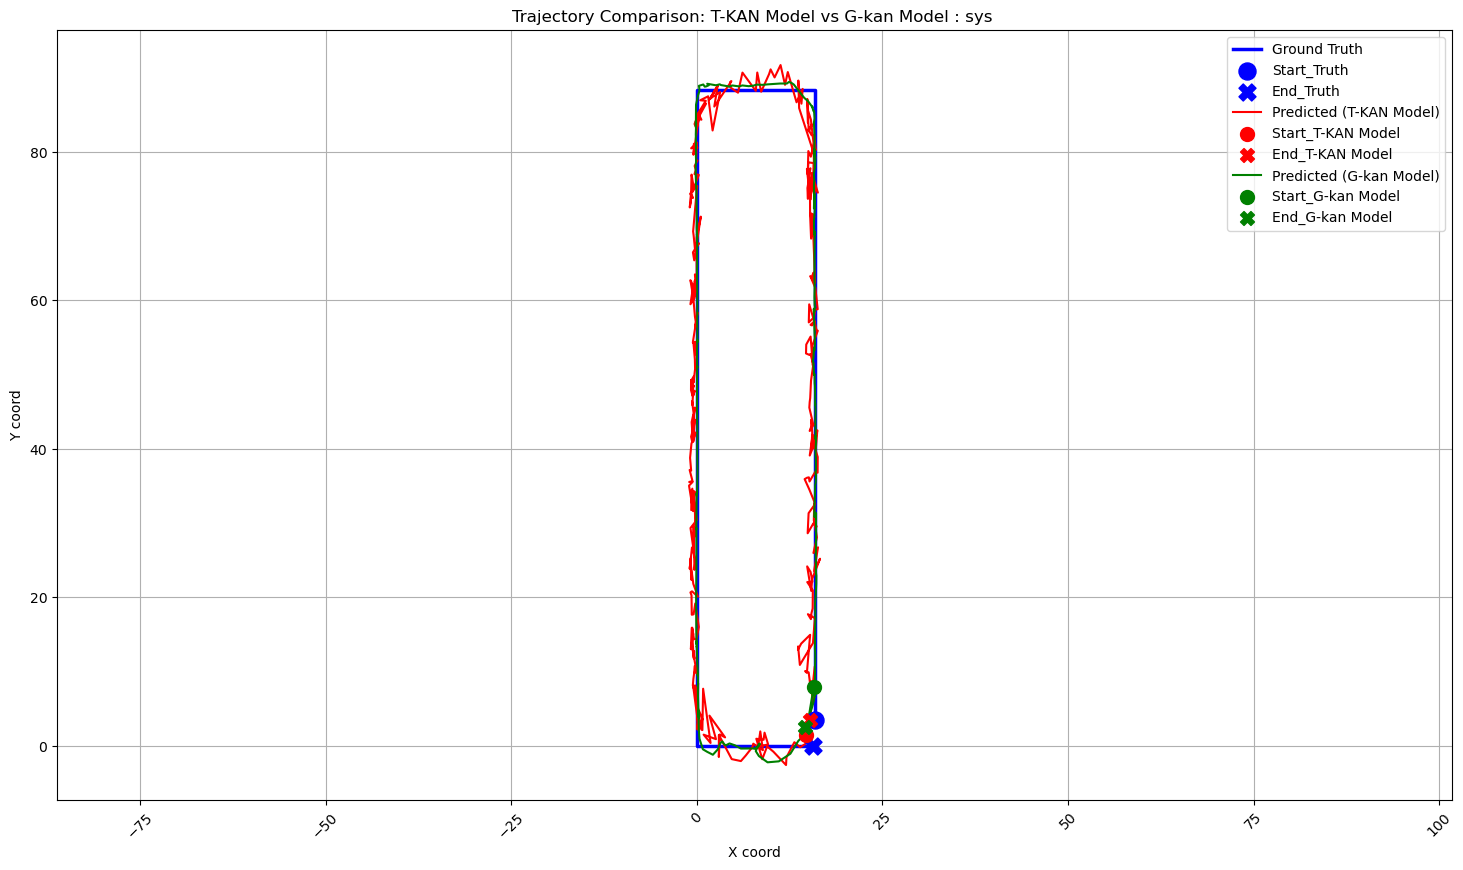

In [24]:
# ==============================================================================
# 1. 文件和模型设置 (您需要修改的部分)
# ==============================================================================
direct = "results/"

# 第一个模型的文件和名称
filename1 = "tkan_x_datasets.csv"  # 假设这是您的第一个模型文件
model1_name = "T-KAN Model"           # 用于图例显示的名称

# 第二个模型的文件和名称
filename2 = "Gkan_Garage_xiaomi.csv"   # ！！！请将这里替换为您的第二个模型文件名 !!!
model2_name = "G-kan Model"           # 用于图例显示的名称

# ==============================================================================
# 2. 加载数据并计算评估指标
# ==============================================================================
# 加载两个模型的数据
df1 = pd.read_csv(direct + filename1)
df2 = pd.read_csv(direct + filename2)

# 提取真实坐标 (假设两个文件中的真实坐标是相同的，所以从 df1 提取即可)
true_coords1 = df1[['True_X', 'True_Y']].values

# --- 模型 1 的评估 ---
pred_coords1 = df1[['Pred_X', 'Pred_Y']].values
mse1 = np.mean((true_coords1 - pred_coords1)**2)
rmse1 = np.sqrt(mse1)

# --- 模型 2 的评估 ---
# 注意：假设第二个文件的预测坐标列名也叫 'Pred_X', 'Pred_Y'
# 如果不是，请在这里修改列名
true_coords2 = df2[['True_X','True_Y']].values
pred_coords2 = df2[['Pred_X', 'Pred_Y']].values
mse2 = np.mean((true_coords2 - pred_coords2)**2)
rmse2 = np.sqrt(mse2)

print("="*50)
print("开始计算最终评估指标...")
print(f"✅ 模型 '{model1_name}' 的 RMSE: {rmse1:.4f} (米)")
print(f"✅ 模型 '{model2_name}' 的 RMSE: {rmse2:.4f} (米)")
print("="*50)


# ==============================================================================
# 3. 准备绘图数据 (降采样以减少绘图点数，让图像更清晰)
# ==============================================================================
sampling_rate = 7  # 每隔 15 个点选取一个

# 真实路径
selected_true_X = df1['True_X'][::sampling_rate]
selected_true_Y = df1['True_Y'][::sampling_rate]

# 模型 1 的预测路径
selected_pred_X1 = df1['Pred_X'][::sampling_rate]
selected_pred_Y1 = df1['Pred_Y'][::sampling_rate]

# 模型 2 的预测路径
selected_pred_X2 = df2['Pred_X'][::sampling_rate]
selected_pred_Y2 = df2['Pred_Y'][::sampling_rate]


# ==============================================================================
# 4. 绘制轨迹对比图
# ==============================================================================
plt.figure(figsize=(18, 10))

# --- 绘制真实路径 (蓝色，实线) ---
plt.plot(selected_true_X, selected_true_Y, label='Ground Truth', color='blue', linewidth=2.5)
plt.scatter(selected_true_X.iloc[0], selected_true_Y.iloc[0], color='blue', marker='o', s=150, zorder=5, label='Start_Truth')
plt.scatter(selected_true_X.iloc[-1], selected_true_Y.iloc[-1], color='blue', marker='X', s=150, zorder=5, label='End_Truth')

# --- 绘制模型 1 的预测路径 (红色，点划线) ---
plt.plot(selected_pred_X1, selected_pred_Y1, label=f'Predicted ({model1_name})', color='red')
plt.scatter(selected_pred_X1.iloc[0], selected_pred_Y1.iloc[0], color='red', marker='o', s=100, zorder=5, label=f'Start_{model1_name}')
plt.scatter(selected_pred_X1.iloc[-1], selected_pred_Y1.iloc[-1], color='red', marker='X', s=100, zorder=5, label=f'End_{model1_name}')

# --- 绘制模型 2 的预测路径 (绿色，虚线) ---
plt.plot(selected_pred_X2, selected_pred_Y2, label=f'Predicted ({model2_name})', color='green')
plt.scatter(selected_pred_X2.iloc[0], selected_pred_Y2.iloc[0], color='green', marker='o', s=100, zorder=5, label=f'Start_{model2_name}')
plt.scatter(selected_pred_X2.iloc[-1], selected_pred_Y2.iloc[-1], color='green', marker='X', s=100, zorder=5, label=f'End_{model2_name}')

# --- 完善图表 ---
plt.xlabel('X coord')
plt.xticks(rotation=45)
plt.ylabel('Y coord')

file="sys"

plt.title(f'Trajectory Comparison: {model1_name} vs {model2_name} : {file} ')
plt.legend(loc='upper right')
plt.grid(True)
plt.axis('equal')  # 关键：确保X和Y轴比例尺相同，路径不会失真

di = "Picture/"
# plt.savefig(di + 'comparison_plot.png') # 如果需要，可以取消这行注释来保存图像
plt.show()
